In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df=pd.read_csv('data/credit_risk.csv')
df.head()

/var/folders/64/xf7p101x7tl2cw7krtff30j80000gn/T/ipykernel_22662/1839228855.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/credit_risk.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [7]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

In [9]:
for col in df.columns:
    if df[col].isnull().sum()> 0:
        df[col].fillna(df[col].mode()[0], inplace= True)

/var/folders/64/xf7p101x7tl2cw7krtff30j80000gn/T/ipykernel_22662/2581397703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace= True)


In [11]:
df.isnull().sum()

id                  0
member_id           0
loan_amnt           0
funded_amnt         0
funded_amnt_inv     0
                   ..
all_util            0
total_rev_hi_lim    0
inq_fi              0
total_cu_tl         0
inq_last_12m        0
Length: 74, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le= LabelEncoder()

In [19]:
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

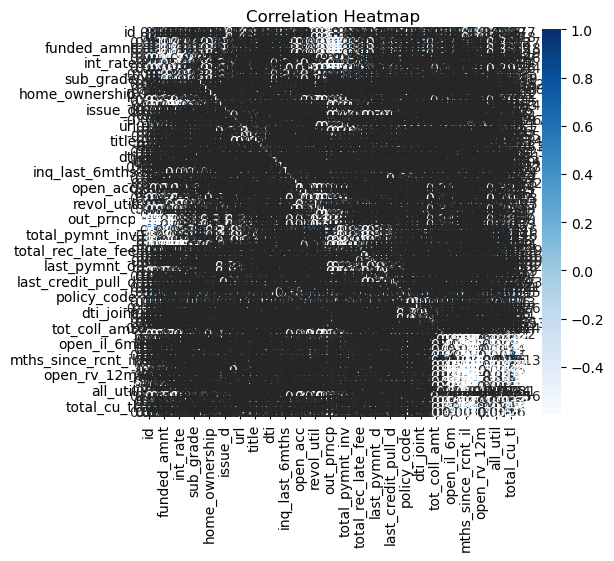

In [27]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap= 'Blues')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
X = df.drop('loan_status', axis=1)

y= df['loan_status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred= model.predict(X_test)

In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[     0   5054      0      0      0   8497     12      0     68      0]
 [     0 160118      0      0      0  19888     92      0    478      0]
 [     0    295      0      0      0     72      1      0      2      0]
 [     0      0      0      0      0    244      0      0      0      0]
 [     0      0      0      0      0    614      0      0      0      0]
 [     0  23081      0      0      0  38819     41      0    266      0]
 [     0   1539      0      0      0    327      4      0      1      0]
 [     0   2500      0      0      0      1      0      0      0      0]
 [     0    584      0      0      0    100      1      0      2      0]
 [     0   2884      0      0      0    611      3      0     15      0]]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     13631
           1       0.82      0.89      0.85    180576
           2       0.00      0.00      0.00       370
           3       0.00      0.00      0.00       244
           4       0.00      0.00      0.00       614
           5       0.56      0.62      0.59     62207
           6       0.03      0.00      0.00      1871
           7       0.00      0.00      0.00      2501
           8       0.00      0.00      0.00       687
           9       0.00      0.00      0.00      3513

    accuracy                           0.75    266214
   macro avg       0.14      0.15      0.14    266214
weighted avg       0.69      0.75      0.71    266214

Accuracy Score: 0.7473047998978266


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
